1.MSSV: 19522351

2.Họ tên: Trần Trung Tín

3.Bài tập: 3

#Kết nối đến google drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
dir_monhoc = '/content/drive/MyDrive/CS231.M12.KHCL/Baitap'
dir_Baitap = os.path.join(dir_monhoc, 'Baitap3')

In [ ]:
dir_train = '/content/gdrive/MyDrive/CS231.M12.KHCL/Baitap/Dataset/dogscats_small/train'
dir_test = '/content/gdrive/MyDrive/CS231.M12.KHCL/Baitap/Dataset/dogscats_small/test1'

#Khai báo thư viện

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage
from scipy.spatial import distance
from sklearn.neighbors import KNeighborsClassifier

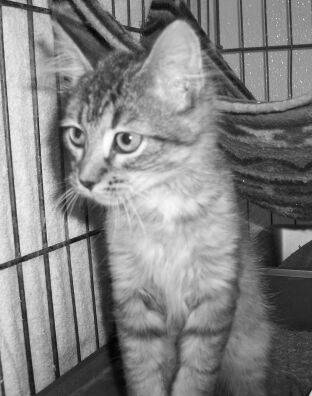

In [ ]:
#Hiện thị ảnh
img = cv.imread(dir_train+'/cat.2.jpg',0)
cv2_imshow(img)

#Tính histogram cho ảnh

In [ ]:
def TinhHist(pathfilename):
  img = cv.imread(pathfilename, 0)
  hist = cv.calcHist([img], [0], None, [256], [0, 256])
  size = img.shape[0] * img.shape[1]
  hist = hist / size
  return hist

In [ ]:
from skimage import feature
def compute_hog_train(pathfilename):
  img = cv.imread(pathfilename,0)
  img = cv.resize(img,(256,256))
  (hog,hog_image)=feature.hog(img, orientations=9,
                              pixels_per_cell=(8, 8), 
                              cells_per_block=(2, 2),
                              block_norm='L2-Hys', visualize=True, transform_sqrt=True)
  return hog

In [ ]:
def ReadData(path_to_files, hog=False):
  labels=[]
  features=[]
  path_files=[]
  for file_name in os.listdir(path_to_files):
    #lấy đường dẫn file
    path_files.append(file_name)
    #sắp xếp lại list đường dẫn file
  sorted(path_files)
  print(path_files)
    #duyệt list đường dẫn để lấy thông tin ảnh
  for i in path_files:
    img= cv.imread(path_to_files+'/'+i)
  # Lấy label của ảnh
    basename=i[:3]
  # -> Thêm vào danh sách labels
    labels.append(basename)
  # Tính đặc trưng của ảnh
    if hog == False:
      feature=TinhHist(path_to_files+'/'+i)
    else:
      feature = compute_hog_train(path_to_files+'/'+i)
  # -> Thêm vào danh sách features
    features.append(feature)
  return features, labels

In [ ]:
for file_name in os.listdir(dir_train):
  print(file_name)

dog.1.jpg
dog.0.jpg
dog.10.jpg
dog.11.jpg
dog.12.jpg
dog.13.jpg
dog.14.jpg
dog.15.jpg
dog.16.jpg
dog.17.jpg
dog.18.jpg
dog.19.jpg
dog.20.jpg
dog.2.jpg
dog.3.jpg
dog.4.jpg
dog.5.jpg
dog.6.jpg
dog.7.jpg
dog.8.jpg
dog.9.jpg
cat.0.jpg
cat.10.jpg
cat.1.jpg
cat.11.jpg
cat.12.jpg
cat.13.jpg
cat.14.jpg
cat.15.jpg
cat.16.jpg
cat.17.jpg
cat.18.jpg
cat.19.jpg
cat.2.jpg
cat.20.jpg
cat.3.jpg
cat.4.jpg
cat.5.jpg
cat.6.jpg
cat.7.jpg
cat.8.jpg
cat.9.jpg


#Sử dụng KNN để phân loại ảnh

In [ ]:
features, labels = ReadData(dir_train)
features = np.array(features)
labels = np.array(labels)
print(features.shape)
print(labels.shape)

['dog.1.jpg', 'dog.0.jpg', 'dog.10.jpg', 'dog.11.jpg', 'dog.12.jpg', 'dog.13.jpg', 'dog.14.jpg', 'dog.15.jpg', 'dog.16.jpg', 'dog.17.jpg', 'dog.18.jpg', 'dog.19.jpg', 'dog.20.jpg', 'dog.2.jpg', 'dog.3.jpg', 'dog.4.jpg', 'dog.5.jpg', 'dog.6.jpg', 'dog.7.jpg', 'dog.8.jpg', 'dog.9.jpg', 'cat.0.jpg', 'cat.10.jpg', 'cat.1.jpg', 'cat.11.jpg', 'cat.12.jpg', 'cat.13.jpg', 'cat.14.jpg', 'cat.15.jpg', 'cat.16.jpg', 'cat.17.jpg', 'cat.18.jpg', 'cat.19.jpg', 'cat.2.jpg', 'cat.20.jpg', 'cat.3.jpg', 'cat.4.jpg', 'cat.5.jpg', 'cat.6.jpg', 'cat.7.jpg', 'cat.8.jpg', 'cat.9.jpg']
(42, 256, 1)
(42,)


In [ ]:
train_features = features.reshape(features.shape[0], features.shape[1])
print(features.shape)

(42, 256, 1)


K = 1

In [ ]:
#train model
model = KNeighborsClassifier(n_neighbors=1)
model.fit(train_features, labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

K = 3

In [ ]:
model1 = KNeighborsClassifier(n_neighbors=3)
model1.fit(train_features, labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

K = 5

In [ ]:
model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(train_features, labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

##Đánh giá độ chính xác

In [ ]:
#Đọc dữ liệu test
labels_test, features_test = [], []
features_test, labels_test = ReadData(dir_test)
features_test = np.array(features_test)
labels_train = np.array(labels_test)

['dog.0.jpg', 'dog.1.jpg', 'dog.2.jpg', 'dog.3.jpg', 'cat.0.jpg', 'cat.1.jpg', 'cat.2.jpg', 'cat.3.jpg', 'cat.5.jpg', 'dog.4.jpg', 'cat.6.jpg', 'cat.7.jpg', 'cat.8.jpg', 'cat.9.jpg', 'dog.6.jpg', 'dog.5.jpg', 'cat.10.jpg', 'cat.12.jpg', 'cat.11.jpg', 'cat.4.jpg']


In [ ]:
features_test=features_test.reshape(features_test.shape[0], features_test.shape[1])

K = 1

In [ ]:
#MODEL VS K=1
acc = model.score(features_test, labels_test)
print("Accuracy: ", acc)

Accuracy:  0.55


K = 3

In [ ]:
acc = model1.score(features_test, labels_test)
print("Accuracy: ", acc)

Accuracy:  0.45


K = 5

In [ ]:
acc = model2.score(features_test, labels_test)
print("Accuracy: ", acc)

Accuracy:  0.6


#04/10/2021: HOG

In [ ]:
train_features1, train_labels1 = ReadData(dir_train, hog=True)
test_features1, test_labels1 = ReadData(dir_test, hog=True)

train_features1 = np.array(train_features1)
train_labels1 = np.array(train_labels1)

test_features1 = np.array(test_features1)
test_labels1 = ['dog', 'cat', 'cat', 'dog', 'cat', 'cat', 'cat',
               'cat', 'dog', 'dog', 'cat', 'dog', 'cat', 'dog',
               'dog', 'cat', 'cat', 'cat', 'cat', 'cat']
test_labels1 = np.array(test_labels1)

['dog.1.jpg', 'dog.0.jpg', 'dog.10.jpg', 'dog.11.jpg', 'dog.12.jpg', 'dog.13.jpg', 'dog.14.jpg', 'dog.15.jpg', 'dog.16.jpg', 'dog.17.jpg', 'dog.18.jpg', 'dog.19.jpg', 'dog.20.jpg', 'dog.2.jpg', 'dog.3.jpg', 'dog.4.jpg', 'dog.5.jpg', 'dog.6.jpg', 'dog.7.jpg', 'dog.8.jpg', 'dog.9.jpg', 'cat.0.jpg', 'cat.10.jpg', 'cat.1.jpg', 'cat.11.jpg', 'cat.12.jpg', 'cat.13.jpg', 'cat.14.jpg', 'cat.15.jpg', 'cat.16.jpg', 'cat.17.jpg', 'cat.18.jpg', 'cat.19.jpg', 'cat.2.jpg', 'cat.20.jpg', 'cat.3.jpg', 'cat.4.jpg', 'cat.5.jpg', 'cat.6.jpg', 'cat.7.jpg', 'cat.8.jpg', 'cat.9.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.2.jpg', 'dog.3.jpg', 'cat.0.jpg', 'cat.1.jpg', 'cat.2.jpg', 'cat.3.jpg', 'cat.5.jpg', 'dog.4.jpg', 'cat.6.jpg', 'cat.7.jpg', 'cat.8.jpg', 'cat.9.jpg', 'dog.6.jpg', 'dog.5.jpg', 'cat.10.jpg', 'cat.12.jpg', 'cat.11.jpg', 'cat.4.jpg']


In [ ]:
print(train_features1.shape)
print(train_labels1.shape)

(42, 34596)
(42,)


In [ ]:
print(test_features1.shape)
print(test_labels1.shape)

(20, 34596)
(20,)


In [ ]:
model1 = KNeighborsClassifier(n_neighbors=1)
model1.fit(train_features1, train_labels1)

model2 = KNeighborsClassifier(n_neighbors=3)
model2.fit(train_features1, train_labels1)

model3 = KNeighborsClassifier(n_neighbors=5)
model3.fit(train_features1, train_labels1)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
acc1 = model1.score(test_features1, test_labels1)
print('Accuracy with k=1: ', acc1)
acc2 = model2.score(test_features1, test_labels1)
print('Accuracy with k=3: ', acc2)
acc3 = model3.score(test_features1, test_labels1)
print('Accuracy with k=5: ', acc3)

Accuracy with k=1:  0.35
Accuracy with k=3:  0.4
Accuracy with k=5:  0.4


#Liner logistic Regression

In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

##Theo HOG

In [ ]:
clf = LogisticRegression(random_state=0).fit(train_features1, train_labels1)
clf.predict(train_features1)
clf.predict_proba(train_features1)
acc = clf.score(test_features1, test_labels1)
print(acc)

0.65


##Theo Histogram

In [ ]:
clf = LogisticRegression(random_state=0).fit(train_features, labels)
clf.predict(train_features)
clf.predict_proba(train_features)
acc = clf.score(features_test, labels_test)
print(acc)

0.45
